### Machine Learning Model Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf

In [2]:
df_analysis=pd.read_csv('./intermediate_files/final_dataframe_singapore_analysis.csv',index_col=0)

### Machine Learning Model:1

In [3]:
df_analysis.head(2)

,raceId,driverId,D_points,D_wins,race_year,constructorId_x,starting_grid,Ending_position,laps_completed,statusId,...,visibility,temperatureHigh,temperatureLow,windSpeed,windBearing,humidity,averagetime_at_pitstop,number,q3,is_win
0,32,1,84.0,1,2008,1,2,3,61,1,...,6.167,90.72,77.47,5.06,152.0,0.79,0.0,22,6327,1
1,32,5,51.0,1,2008,1,5,10,61,1,...,6.167,90.72,77.47,5.06,152.0,0.79,0.0,23,6352,1


In [4]:
X =df_analysis.iloc[:,:-1]
y =df_analysis.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
X_train

,raceId,driverId,D_points,D_wins,race_year,constructorId_x,starting_grid,Ending_position,laps_completed,statusId,...,con_position,visibility,temperatureHigh,temperatureLow,windSpeed,windBearing,humidity,averagetime_at_pitstop,number,q3
38,14,1,37.0,1,2009,1,1,1,61,1,...,4,5.380,92.29,81.09,6.34,188.0,0.74,0.000000,1,6473
143,913,826,8.0,0,2014,5,10,14,60,1,...,7,4.940,90.22,77.30,5.60,217.0,0.77,30456.333333,26,6441
84,854,24,0.0,0,2011,164,24,20,57,14,...,11,6.037,91.99,74.62,5.29,175.0,0.76,35264.500000,23,6768
55,351,3,122.0,0,2010,131,7,5,61,1,...,4,6.104,90.61,79.58,2.21,183.0,0.72,0.000000,4,6386
219,1003,822,171.0,0,2018,131,4,4,61,1,...,1,9.831,88.43,79.36,9.87,157.0,0.76,28542.000000,77,5802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,873,818,8.0,0,2012,5,16,20,38,4,...,9,5.365,91.54,77.78,4.73,197.0,0.76,30198.500000,17,6530
14,32,17,20.0,0,2008,9,13,18,29,7,...,7,6.167,90.72,77.47,5.06,152.0,0.79,0.000000,10,6312
92,873,10,0.0,0,2012,206,20,12,59,1,...,10,5.365,91.54,77.78,4.73,197.0,0.76,31496.000000,24,6682
179,962,830,129.0,1,2016,9,4,6,61,1,...,2,5.945,92.92,77.95,4.22,248.0,0.75,28089.250000,33,6199


In [11]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()

LogReg.fit(X_train, y_train)



/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
print("Training Set Scores:")
print(f" Logistic regression training set score: {LogReg.score(X_train, y_train)}")

print("Test Set Scores:")
print(f"Logistic regression testing score: {LogReg.score(X_test, y_test)}")


Training Set Scores:
 Logistic regression training set score: 1.0
Test Set Scores:
Logistic regression testing score: 0.9019607843137255


In [13]:
from sklearn.metrics import confusion_matrix

y_pred = LogReg.predict(X_test)

In [14]:
cm=confusion_matrix(y_test, y_pred)

In [15]:
# Precision 
from sklearn.metrics import precision_score

# precision_score(true labels, predicted labels)
precision_score(y_test, y_pred)

0.9375

In [16]:
# Recall
from sklearn.metrics import recall_score

# recall_score(true labels, predicted labels)
recall_score(y_test, y_pred)

0.9090909090909091

In [17]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.923076923076923

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.94      0.91      0.92        33

    accuracy                           0.90        51
   macro avg       0.89      0.90      0.89        51
weighted avg       0.90      0.90      0.90        51



In [19]:
predicted_prbability=LogReg.predict_proba(X_test)[:,1]

In [20]:
predicted_prbability.shape

(51,)

### ROC and AUC curve

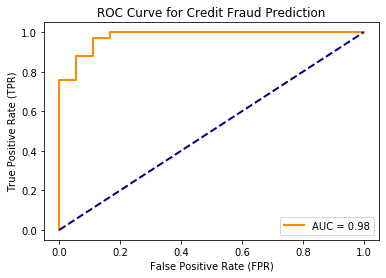

Area under curve (AUC):0.9781144781144782



In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

fprs, tprs, thresholds = roc_curve(y_test, predicted_prbability)
roc_auc = roc_auc_score(y_test, predicted_prbability)

plt.figure()
plt.plot(fprs, tprs, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Credit Fraud Prediction')
plt.legend(loc="best")
plt.show()

print(f'Area under curve (AUC):{roc_auc}')
print()

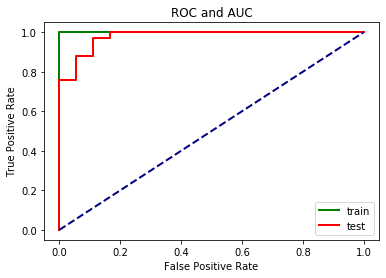

Test AUC score: 0.9781144781144782
Train AUC score: 1.0


In [22]:
#Get the probability for each point in the train set.
y_proba_train = LogReg.predict_proba(X_train)[:,1]

# Compute ROC curve and AUC for for the one class
fprs_train, tprs_train, thresholds_train = roc_curve(y_train, y_proba_train)
roc_auc_train = roc_auc_score(y_train, y_proba_train)
  
# Plot the ROC curve.
plt.figure()
plt.plot(fprs_train, tprs_train, color='green', lw=2, label='train')
plt.plot(fprs, tprs, color='red',lw=2, label='test')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC')
plt.legend(loc="best")
plt.show()
print(f"Test AUC score: {roc_auc}")
print(f"Train AUC score: {roc_auc_train}")

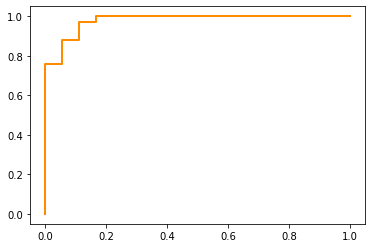

In [23]:
NUM_points = 50
plt.figure()
plt.plot(fprs[:NUM_points], tprs[:NUM_points], color='darkorange', lw=2)
plt.show()



### Training,Validation and Test set

In [24]:
# Taking a chuck for our 20% test set
X_remainder, X_test, y_remainder, y_test = \
    train_test_split(X, y, test_size = 0.2,
                     random_state=1)

In [25]:
# Splitting the remainder in two chunks
X_train, X_validation, y_train, y_validation = \
    train_test_split(X_remainder, y_remainder, test_size = 0.3,
                     random_state=1)

In [26]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()

LogReg.fit(X_train, y_train)

print("TRaining Set Scores:")
print(f" Logistic regression training set score: {LogReg.score(X_train, y_train)}")

print("Test Set Scores:")
print(f"Logistic regression testing score: {LogReg.score(X_test, y_test)}")


TRaining Set Scores:
 Logistic regression training set score: 1.0
Test Set Scores:
Logistic regression testing score: 0.9215686274509803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Hyper Parameter Tuning

In [27]:
from sklearn.linear_model import LogisticRegression

validation_scores = []
train_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,0.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

for c in C_range:
    my_logreg = LogisticRegression(C = c,random_state=1)
    my_logreg.fit(X_train,y_train)
    
    # train on traning set
    train_scores.append(my_logreg.score(X_train,y_train))
    # score on validation set
    validation_scores.append(my_logreg.score(X_validation,y_validation))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

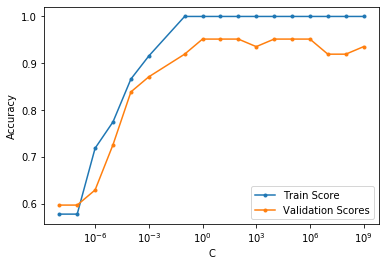

In [28]:
plt.figure()
plt.plot(C_range, train_scores,label="Train Score",marker='.')
plt.plot(C_range, validation_scores,label="Validation Scores",marker='.')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

Based on this plot, we would say C=10 is the model with the best fit. 

How do I report a final evaluation of my model?

In [29]:
my_final_model = LogisticRegression(solver='lbfgs',C=10,random_state=1)

# Remember that X_remainder and y_remainder held the data I split into train and validation
# I can use that data to re-train my model
my_final_model.fit(X_remainder,y_remainder)
my_final_model.score(X_test,y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9215686274509803

# Cross Validation

In [30]:
split = 0.2

X_train_one, X_validation_one, y_train_one, y_validation_one  = train_test_split(X,y, test_size = split, 
                                                                                 random_state = 10)
X_train_two, X_validation_two, y_train_two, y_validation_two = train_test_split(X,y, test_size = 
                                                                                split, random_state = 3)

Each pair of sets contains data from the same data set, but how it is split between their respective training and validation sets is different. This can have a very big impact on model selection. 

Say we wanted to fit a logistic regression model. We can fit the model to each training set and evaluate it on the respective validation set, finding the best $C$ for each.

#### First Split

In [31]:
# for first train validation split

validation_scores = []
train_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

for c in C_range :
    my_logreg = LogisticRegression(C = c,random_state=1)
    
    #using the data from the first split
    my_logreg.fit(X_train_one,y_train_one);
    train_scores.append(my_logreg.score(X_train_one,y_train_one))
    validation_scores.append(my_logreg.score(X_validation_one,y_validation_one))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

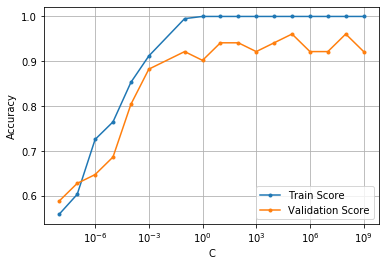

In [32]:
#plotting results
plt.figure()
plt.plot(C_range,train_scores, label='Train Score',marker='.')
plt.plot(C_range,validation_scores, label='Validation Score',marker='.')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale("log")
plt.grid()
plt.legend()
plt.show()

Based on this plot above, we would choose somewhere around **$C$=10**. 

#### Second Split

In [33]:
# for second train validation split
validation_scores = []
train_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

for c in C_range :
    my_logreg = LogisticRegression(C = c,random_state=1)
    
    # using the data from the second split
    my_logreg.fit(X_train_two,y_train_two);
    train_scores.append(my_logreg.score(X_train_two,y_train_two))
    validation_scores.append(my_logreg.score(X_validation_two,y_validation_two))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

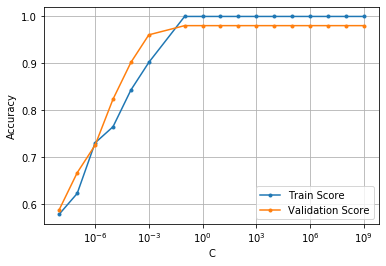

In [34]:
#plotting results
plt.figure()
plt.plot(C_range,train_scores, label='Train Score',marker='.')
plt.plot(C_range,validation_scores, label='Validation Score',marker='.')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale("log")
plt.grid()
plt.legend()
plt.show()

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
# Splitting out 20% for test set
X_remainder, X_test, y_remainder, y_test = \
    train_test_split(X, y, test_size = 0.2,random_state=1)

We no longer need to do a train and validation split with the remainder of the data. Cross-validation will do that for us!

### 5-fold cross validation

In [37]:

# 1. Instanitate model

my_logreg = LogisticRegression(random_state=1)

# 2. Fit model on 5 folds.

# The variable "scores" will hold 5 accuracy scores, 
# each from a different train and validation split


scores = cross_val_score(my_logreg, X_remainder, y_remainder, cv = 5)


print(scores)

[0.97560976 0.90243902 1.         0.95121951 0.975     ]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [38]:
# Every score corresponds to a fold

for i in range(len(scores)) :
    
    print(f"Fold {i+1}: {scores[i]}")

Fold 1: 0.975609756097561
Fold 2: 0.9024390243902439
Fold 3: 1.0
Fold 4: 0.9512195121951219
Fold 5: 0.975


This provided us the score on each of the 5 validation sets. If we wanted the average score over the 5 folds:

In [39]:
print(f"Average Score:{np.mean(scores)}")

Average Score:0.9608536585365852


In [40]:
X=df_analysis.iloc[:,:-1]
y=df_analysis.iloc[:,-1]

In [41]:
# Taking a chuck for our 20% test set
X_remainder, X_test, y_remainder, y_test = \
    train_test_split(X, y, test_size = 0.2,
                     random_state=1)

In [42]:
# Splitting the remainder in two chunks
X_train, X_validation, y_train, y_validation = \
    train_test_split(X_remainder, y_remainder, test_size = 0.3,
                     random_state=1)

In [43]:
test_scores = []
validation_scores = []
train_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

for c in C_range :
    my_logreg = LogisticRegression(C = c,random_state=1)
    my_logreg.fit(X_train,y_train);
    train_scores.append(my_logreg.score(X_train,y_train))
    test_scores.append(my_logreg.score(X_test,y_test))
    validation_scores.append(my_logreg.score(X_validation,y_validation))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

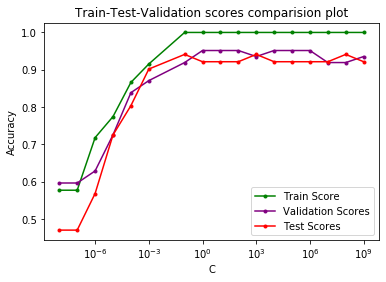

In [44]:
plt.figure()
plt.plot(C_range, train_scores,label="Train Score",marker='.',color='g')
plt.plot(C_range, validation_scores,label="Validation Scores",marker='.',color='purple')
plt.plot(C_range, test_scores,label="Test Scores",marker='.',color='red')

plt.xscale('log')
plt.title("Train-Test-Validation scores comparision plot")
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend();
plt.show();

### LASSO MODEL

In [46]:
from sklearn.linear_model import Lasso

In [47]:
from sklearn.linear_model import Lasso

my_lasso=Lasso()
my_lasso.fit(X,y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [48]:
my_lasso.coef_

array([-0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -1.06469418e-03, -0.00000000e+00, -1.61658654e-02,
        8.30151373e-03, -0.00000000e+00, -0.00000000e+00,  7.21722169e-04,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -1.82158992e-06,
       -0.00000000e+00, -1.30082446e-04])

In [49]:
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf = LogisticRegression(penalty='l2', solver='saga', C=0.1)

clf.fit(X_train,y_train)

print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.5833333333333334
0.5294117647058824


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [50]:
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

lin_reg = LogisticRegression(penalty='l1', solver='saga',C=0.01)

lin_reg.fit(X_train,y_train)

print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.5735294117647058
0.5686274509803921


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [51]:
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

lin_reg = LogisticRegression(penalty='l1', solver='saga',C=1)

lin_reg.fit(X_train,y_train)

print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.5784313725490197
0.5490196078431373


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

from sklearn.linear_model import LogisticRegression
#penalty = 'l2',C=0.1

#penalty = 'l1',C=1

#penalty = 'l1',C=0.01
clf = LogisticRegression(penalty='l2', solver='saga')
clf = Ridge(alpha=0.1)
clf.fit(X, y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

### Confusion matrix plot

In [53]:
cm = confusion_matrix(y_test, y_pred)

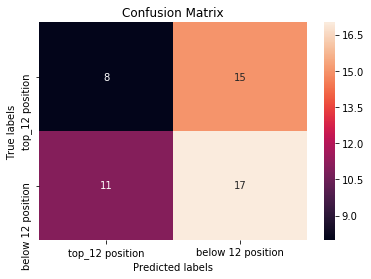

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['top_12 position','below 12 position']); 
ax.yaxis.set_ticklabels(['top_12 position','below 12 position']);

In [55]:
X_test=X_test.assign(Predicted_probability=" ")

In [56]:
X_test['Predicted_probability']=predicted_prbability


In [57]:
X_test

,raceId,driverId,D_points,D_wins,race_year,constructorId_x,starting_grid,Ending_position,laps_completed,statusId,...,visibility,temperatureHigh,temperatureLow,windSpeed,windBearing,humidity,averagetime_at_pitstop,number,q3,Predicted_probability
158,939,13,97.0,0,2015,3,9,19,30,6,...,4.261,91.65,80.91,4.59,92.0,0.76,28567.333333,19,6364,2.902490e-08
82,854,155,27.0,0,2011,15,17,14,59,12,...,6.037,91.99,74.62,5.29,175.0,0.76,29412.500000,16,6483,1.000000e+00
115,893,17,130.0,0,2013,9,4,15,60,34,...,6.208,91.56,79.17,8.46,180.0,0.72,28970.000000,2,6189,9.146165e-01
107,873,817,6.0,0,2012,5,15,9,59,1,...,5.365,91.54,77.78,4.73,197.0,0.76,30390.500000,16,6526,9.916026e-01
85,854,817,0.0,0,2011,164,23,19,57,14,...,6.037,91.99,74.62,5.29,175.0,0.76,37336.666667,22,6744,9.999917e-01
47,351,807,17.0,0,2010,3,17,10,61,1,...,6.104,90.61,79.58,2.21,183.0,0.72,0.000000,10,6460,9.998968e-01
128,893,824,0.0,0,2013,206,21,18,60,11,...,6.208,91.56,79.17,8.46,180.0,0.72,30265.000000,22,6529,9.999985e-01
222,1003,4,50.0,0,2018,1,11,7,61,1,...,9.831,88.43,79.36,9.87,157.0,0.76,29922.000000,14,5918,9.996646e-01
121,893,815,22.0,0,2013,1,14,8,61,1,...,6.208,91.56,79.17,8.46,180.0,0.72,29052.500000,6,6285,9.999999e-01
207,982,826,4.0,0,2017,5,13,16,10,3,...,6.112,91.55,79.08,6.75,149.0,0.76,28365.000000,26,6140,5.384893e-01


In [58]:
X_test=X_test[['driverId','Predicted_probability']]

In [59]:
X_test

,driverId,Predicted_probability
158,13,2.902490e-08
82,155,1.000000e+00
115,17,9.146165e-01
107,817,9.916026e-01
85,817,9.999917e-01
47,807,9.998968e-01
128,824,9.999985e-01
222,4,9.996646e-01
121,815,9.999999e-01
207,826,5.384893e-01


Mean absolute Error 0.4624729100405816


Text(0.5, 1.0, 'Prediction')

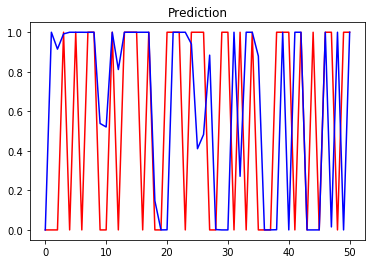

In [60]:
from sklearn.metrics import mean_absolute_error
print ("Mean absolute Error" , mean_absolute_error(y_test, predicted_prbability))
plt.plot(y_test.values, color = 'red', label = 'Real data')
plt.plot(predicted_prbability, color = 'blue', label = 'Predicted data')
plt.title('Prediction')

### Machine Learning Prediction:without ending position

In [61]:
df_analysis = df_analysis.drop(['Ending_position'],axis=1)

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
X=df_analysis.iloc[:,:-1]
y=df_analysis.iloc[:,-1]

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [66]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()

LogReg.fit(X_train, y_train)

print("TRaining Set Scores:")
print(f" Logistic regression training set score: {LogReg.score(X_train, y_train)}")

print("Test Set Scores:")
print(f"Logistic regression testing score: {LogReg.score(X_test, y_test)}")


TRaining Set Scores:
 Logistic regression training set score: 0.9068627450980392
Test Set Scores:
Logistic regression testing score: 0.8431372549019608


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [67]:
from sklearn.metrics import confusion_matrix

y_pred = LogReg.predict(X_test)

In [68]:
confusion_matrix(y_test, y_pred)

array([[21,  6],
       [ 2, 22]])

In [69]:
# Precision 
from sklearn.metrics import precision_score

# precision_score(true labels, predicted labels)
precision_score(y_test, y_pred)

0.7857142857142857

In [70]:
# Recall
from sklearn.metrics import recall_score

# recall_score(true labels, predicted labels)
recall_score(y_test, y_pred)

0.9166666666666666

In [71]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.8461538461538461

In [72]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.79      0.92      0.85        24

    accuracy                           0.84        51
   macro avg       0.85      0.85      0.84        51
weighted avg       0.85      0.84      0.84        51



In [73]:
predicted_prbability=LogReg.predict_proba(X_test)[:,1]

In [74]:
predicted_prbability.shape

(51,)

In [75]:
X_test=X_test.assign(Predicted_probability=" ")

In [76]:
X_test['Predicted_probability']=predicted_prbability


In [77]:
X_test

,raceId,driverId,D_points,D_wins,race_year,constructorId_x,starting_grid,laps_completed,statusId,D_age,...,visibility,temperatureHigh,temperatureLow,windSpeed,windBearing,humidity,averagetime_at_pitstop,number,q3,Predicted_probability
182,962,154,28.0,0,2016,210,20,0,54,33,...,5.945,92.92,77.95,4.22,248.0,0.75,0.000000,8,6343,1.471232e-19
34,14,8,40.0,1,2009,6,12,61,1,40,...,5.380,92.29,81.09,6.34,188.0,0.74,0.000000,4,6430,9.265630e-01
110,893,8,149.0,1,2013,208,13,61,1,40,...,6.208,91.56,79.17,8.46,180.0,0.72,31241.000000,7,6279,9.125303e-01
112,893,4,187.0,1,2013,6,7,61,1,38,...,6.208,91.56,79.17,8.46,180.0,0.72,29306.000000,3,6236,9.883023e-01
226,1003,815,46.0,0,2018,10,7,60,11,30,...,9.831,88.43,79.36,9.87,157.0,0.76,28293.000000,11,5879,3.865480e-01
107,873,817,6.0,0,2012,5,15,59,1,30,...,5.365,91.54,77.78,4.73,197.0,0.76,30390.500000,16,6526,5.882819e-01
159,939,822,101.0,0,2015,3,7,61,1,30,...,4.261,91.65,80.91,4.59,92.0,0.76,29249.500000,77,6340,9.994629e-01
27,14,67,3.0,0,2009,5,13,47,6,31,...,5.380,92.29,81.09,6.34,188.0,0.74,0.000000,12,6442,2.225545e-04
245,1024,8,31.0,0,2019,51,12,49,4,40,...,10.000,90.34,79.85,10.33,121.0,0.79,29992.000000,7,5931,6.001596e-03
186,962,832,30.0,0,2016,5,6,60,11,25,...,5.945,92.92,77.95,4.22,248.0,0.75,28629.000000,55,6251,9.354147e-01


In [78]:
X_test=X_test[['driverId','Predicted_probability']]

In [79]:
X_test

,driverId,Predicted_probability
182,154,1.471232e-19
34,8,9.265630e-01
110,8,9.125303e-01
112,4,9.883023e-01
226,815,3.865480e-01
107,817,5.882819e-01
159,822,9.994629e-01
27,67,2.225545e-04
245,8,6.001596e-03
186,832,9.354147e-01


Mean absolute Error 0.18568633086832684


Text(0.5, 1.0, 'Prediction')

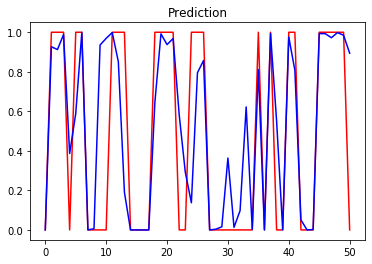

In [80]:
from sklearn.metrics import mean_absolute_error
print ("Mean absolute Error" , mean_absolute_error(y_test, predicted_prbability))
plt.plot(y_test.values, color = 'red', label = 'Real data')
plt.plot(predicted_prbability, color = 'blue', label = 'Predicted data')
plt.title('Prediction')

### Predicted results with Actual 2019 singapore test results comparision

In [83]:
df_analysis

,raceId,driverId,D_points,D_wins,race_year,constructorId_x,starting_grid,laps_completed,statusId,D_age,...,visibility,temperatureHigh,temperatureLow,windSpeed,windBearing,humidity,averagetime_at_pitstop,number,q3,is_win
0,32,1,84.0,1,2008,1,2,61,1,35,...,6.167,90.72,77.47,5.06,152.0,0.79,0.0,22,6327,1
1,32,5,51.0,1,2008,1,5,61,1,38,...,6.167,90.72,77.47,5.06,152.0,0.79,0.0,23,6352,1
2,32,2,56.0,0,2008,2,9,61,1,42,...,6.167,90.72,77.47,5.06,152.0,0.79,0.0,3,6357,1
3,32,9,64.0,1,2008,2,4,61,1,35,...,6.167,90.72,77.47,5.06,152.0,0.79,0.0,4,6346,1
4,32,3,17.0,0,2008,3,8,61,1,34,...,6.167,90.72,77.47,5.06,152.0,0.79,0.0,7,6396,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,1024,842,69.0,0,2019,5,11,61,1,24,...,10.000,90.34,79.85,10.33,121.0,0.79,32482.0,10,5921,1
251,1024,846,31.0,0,2019,1,9,61,1,20,...,10.000,90.34,79.85,10.33,121.0,0.79,30397.0,4,5899,1
252,1024,832,58.0,0,2019,1,7,61,1,25,...,10.000,90.34,79.85,10.33,121.0,0.79,30623.0,55,5869,1
253,1024,847,0.0,0,2019,3,18,34,4,22,...,10.000,90.34,79.85,10.33,121.0,0.79,38752.0,63,6052,0


### Analysis on singapore race excluding 2019 data for only test data

In [84]:
X_test_2019=df_analysis.loc[(df_analysis['race_year']==2019)]

In [85]:
X_test_2019.to_csv('./intermediate_files/X_test_2019.csv')

In [86]:
df_exclude_2019=df_analysis.loc[df_analysis['race_year']!=2019]

In [87]:
df_exclude_2019

,raceId,driverId,D_points,D_wins,race_year,constructorId_x,starting_grid,laps_completed,statusId,D_age,...,visibility,temperatureHigh,temperatureLow,windSpeed,windBearing,humidity,averagetime_at_pitstop,number,q3,is_win
0,32,1,84.0,1,2008,1,2,61,1,35,...,6.167,90.72,77.47,5.06,152.0,0.79,0.000000,22,6327,1
1,32,5,51.0,1,2008,1,5,61,1,38,...,6.167,90.72,77.47,5.06,152.0,0.79,0.000000,23,6352,1
2,32,2,56.0,0,2008,2,9,61,1,42,...,6.167,90.72,77.47,5.06,152.0,0.79,0.000000,3,6357,1
3,32,9,64.0,1,2008,2,4,61,1,35,...,6.167,90.72,77.47,5.06,152.0,0.79,0.000000,4,6346,1
4,32,3,17.0,0,2008,3,8,61,1,34,...,6.167,90.72,77.47,5.06,152.0,0.79,0.000000,7,6396,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,1003,845,1.0,0,2018,3,19,59,12,24,...,9.831,88.43,79.36,9.87,157.0,0.76,32249.500000,35,6075,0
232,1003,843,2.0,0,2018,5,17,60,11,30,...,9.831,88.43,79.36,9.87,157.0,0.76,29688.000000,28,5988,0
233,1003,842,28.0,0,2018,5,15,60,11,24,...,9.831,88.43,79.36,9.87,157.0,0.76,28931.000000,10,5981,0
234,1003,154,27.0,0,2018,210,8,60,11,33,...,9.831,88.43,79.36,9.87,157.0,0.76,29517.000000,8,5899,0


### The following is separation of training and test data other than 2019 data to model

In [88]:
X_singapore=df_exclude_2019

In [89]:
X_singapore.columns

Index(['raceId', 'driverId', 'D_points', 'D_wins', 'race_year',
       'constructorId_x', 'starting_grid', 'laps_completed', 'statusId',
       'D_age', 'con_points', 'con_position', 'visibility', 'temperatureHigh',
       'temperatureLow', 'windSpeed', 'windBearing', 'humidity',
       'averagetime_at_pitstop', 'number', 'q3', 'is_win'],
      dtype='object')

In [90]:
X_train_singapore=X_singapore[['raceId', 'driverId', 'D_points',  'D_wins', 'race_year',
       'constructorId_x', 'starting_grid', 
       'laps_completed', 'statusId', 'D_age', 'con_points', 'con_position',
       'visibility', 'temperatureHigh', 'temperatureLow', 'windSpeed',
       'windBearing', 'humidity', 'averagetime_at_pitstop', 'number', 'q3']]


In [91]:
y_train_singapore=X_singapore[['is_win']]

### spliting 2019 target column and independent variable to test the model 

In [92]:
X_test_singapore=X_test_2019[['raceId', 'driverId', 'D_points','D_wins', 'race_year',
       'constructorId_x', 'starting_grid', 
       'laps_completed', 'statusId', 'D_age', 'con_points', 'con_position',
       'visibility', 'temperatureHigh', 'temperatureLow', 'windSpeed',
       'windBearing', 'humidity', 'averagetime_at_pitstop', 'number', 'q3']]

In [93]:
y_test_singapore=X_test_2019[['is_win']]

### Feed in data othe than 2019 to train the logit model

In [94]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()

LogReg.fit(X_train_singapore, y_train_singapore)

print("TRaining Set Scores:")
print(f" Logistic regression training set score: {LogReg.score(X_train_singapore, y_train_singapore)}")

print("Test Set Scores:")
print(f"Logistic regression testing score: {LogReg.score(X_test_singapore, y_test_singapore)}")


TRaining Set Scores:
 Logistic regression training set score: 0.9152542372881356
Test Set Scores:
Logistic regression testing score: 0.7894736842105263


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [95]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score

In [96]:
models = []
models.append(SVC())
models.append(LinearSVC())
models.append(GaussianNB())
models.append(LogisticRegression())
models.append(KNeighborsClassifier())
models.append(RandomForestClassifier())
models.append(DecisionTreeClassifier())
models.append(GradientBoostingClassifier())

accuracy_list = []
for model in models:
    model.fit(X_train_singapore, y_train_singapore)
    y_pred = model.predict(X_test_singapore)
    accuracy = (accuracy_score(y_pred, y_test_singapore, normalize=True)*100)
    accuracy_list.append(accuracy)
    
    
    
model_name_list = ["SVM","Linear SVC","Gaussian NB","Logistic Regression",
                   "K-Neighbors Classifier","Random Forest Classifier","Decision Tree","Gradient Boosting"]

best_model = pd.DataFrame({"Model": model_name_list, "Score": accuracy_list})
best_model.sort_values(by="Score", ascending=False)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the num

,Model,Score
2,Gaussian NB,78.947368
3,Logistic Regression,78.947368
5,Random Forest Classifier,78.947368
6,Decision Tree,73.684211
7,Gradient Boosting,73.684211
0,SVM,63.157895
4,K-Neighbors Classifier,63.157895
1,Linear SVC,36.842105


### Model performance without weather data

In [99]:
df_analysis=pd.read_csv('./intermediate_files/final_dataframe_singapore_analysis.csv',index_col=0)

In [100]:
df_analysis.columns

Index(['raceId', 'driverId', 'D_points', 'D_wins', 'race_year',
       'constructorId_x', 'starting_grid', 'Ending_position', 'laps_completed',
       'statusId', 'D_age', 'con_points', 'con_position', 'visibility',
       'temperatureHigh', 'temperatureLow', 'windSpeed', 'windBearing',
       'humidity', 'averagetime_at_pitstop', 'number', 'q3', 'is_win'],
      dtype='object')

In [102]:
df_analysis=df_analysis[['raceId', 'driverId', 'D_points', 'D_wins', 'race_year',
       'constructorId_x', 'starting_grid', 'laps_completed', 'statusId',
       'D_age', 'con_points', 'con_position',
       'averagetime_at_pitstop', 'number', 'q3', 'is_win']]

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X=df_analysis.iloc[:,:-1]
y=df_analysis.iloc[:,-1]

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [106]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(solver='lbfgs')

LogReg.fit(X_train, y_train)

print("TRaining Set Scores:")
print(f" Logistic regression training set score: {LogReg.score(X_train, y_train)}")

print("Test Set Scores:")
print(f"Logistic regression testing score: {LogReg.score(X_test, y_test)}")


TRaining Set Scores:
 Logistic regression training set score: 0.8480392156862745
Test Set Scores:
Logistic regression testing score: 0.803921568627451


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [107]:
from sklearn.metrics import confusion_matrix

y_pred = LogReg.predict(X_test)

In [108]:
cm=confusion_matrix(y_test, y_pred)

In [109]:
# Precision 
from sklearn.metrics import precision_score

# precision_score(true labels, predicted labels)
precision_score(y_test, y_pred)

0.71875

In [110]:
# Recall
from sklearn.metrics import recall_score

# recall_score(true labels, predicted labels)
recall_score(y_test, y_pred)

0.9583333333333334

In [111]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.8214285714285714

In [112]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.67      0.78        27
           1       0.72      0.96      0.82        24

    accuracy                           0.80        51
   macro avg       0.83      0.81      0.80        51
weighted avg       0.84      0.80      0.80        51



In [113]:
predicted_prbability=LogReg.predict_proba(X_test)[:,1]

In [114]:
predicted_prbability.shape

(51,)

### Confusion matrix plot

In [115]:
cm = confusion_matrix(y_test, y_pred)

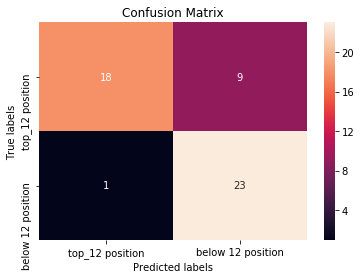

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['top_12 position','below 12 position']); 
ax.yaxis.set_ticklabels(['top_12 position','below 12 position']);

In [117]:
X_test=X_test.assign(Predicted_probability=" ")

In [118]:
X_test['Predicted_probability']=predicted_prbability


In [119]:
X_test

,raceId,driverId,D_points,D_wins,race_year,constructorId_x,starting_grid,laps_completed,statusId,D_age,con_points,con_position,averagetime_at_pitstop,number,q3,Predicted_probability
182,962,154,28.0,0,2016,210,20,0,54,33,28.0,8,0.000000,8,6343,0.000005
34,14,8,40.0,1,2009,6,12,61,1,40,62.0,3,0.000000,4,6430,0.927142
110,893,8,149.0,1,2013,208,13,61,1,40,206.0,4,31241.000000,7,6279,0.956350
112,893,4,187.0,1,2013,6,7,61,1,38,274.0,2,29306.000000,3,6236,0.990907
226,1003,815,46.0,0,2018,10,7,60,11,30,32.0,7,28293.000000,11,5879,0.946898
107,873,817,6.0,0,2012,5,15,59,1,30,14.0,9,30390.500000,16,6526,0.383863
159,939,822,101.0,0,2015,3,7,61,1,30,198.0,3,29249.500000,77,6340,0.738515
27,14,67,3.0,0,2009,5,13,47,6,31,5.0,10,0.000000,12,6442,0.461510
245,1024,8,31.0,0,2019,51,12,49,4,40,35.0,8,29992.000000,7,5931,0.884972
186,962,832,30.0,0,2016,5,6,60,11,25,47.0,7,28629.000000,55,6251,0.533215


In [120]:
X_test=X_test[['driverId','Predicted_probability']]

In [121]:
X_test

,driverId,Predicted_probability
182,154,0.000005
34,8,0.927142
110,8,0.956350
112,4,0.990907
226,815,0.946898
107,817,0.383863
159,822,0.738515
27,67,0.461510
245,8,0.884972
186,832,0.533215


Mean absolute Error 0.26034741058039035


Text(0.5, 1.0, 'Prediction')

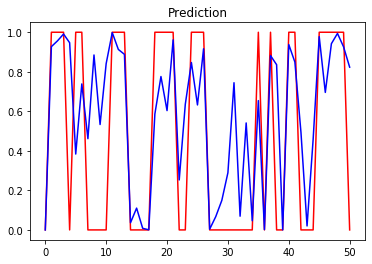

In [122]:
from sklearn.metrics import mean_absolute_error
print ("Mean absolute Error" , mean_absolute_error(y_test, predicted_prbability))
plt.plot(y_test.values, color = 'red', label = 'Real data')
plt.plot(predicted_prbability, color = 'blue', label = 'Predicted data')
plt.title('Prediction')

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [125]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()

LogReg.fit(X_train, y_train)

print("TRaining Set Scores:")
print(f" Logistic regression training set score: {LogReg.score(X_train, y_train)}")

print("Test Set Scores:")
print(f"Logistic regression testing score: {LogReg.score(X_test, y_test)}")


TRaining Set Scores:
 Logistic regression training set score: 0.8970588235294118
Test Set Scores:
Logistic regression testing score: 0.8431372549019608


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [126]:
from sklearn.metrics import confusion_matrix

y_pred = LogReg.predict(X_test)

In [127]:
cm=confusion_matrix(y_test, y_pred)

In [128]:
# Precision 
from sklearn.metrics import precision_score

# precision_score(true labels, predicted labels)
precision_score(y_test, y_pred)

0.7857142857142857

In [129]:
# Recall
from sklearn.metrics import recall_score

# recall_score(true labels, predicted labels)
recall_score(y_test, y_pred)

0.9166666666666666

In [130]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.8461538461538461

In [131]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.79      0.92      0.85        24

    accuracy                           0.84        51
   macro avg       0.85      0.85      0.84        51
weighted avg       0.85      0.84      0.84        51



In [132]:
predicted_prbability=LogReg.predict_proba(X_test)[:,1]

In [133]:
predicted_prbability.shape

(51,)

### Confusion matrix plot

In [134]:
cm = confusion_matrix(y_test, y_pred)

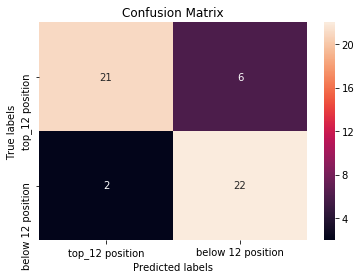

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['top_12 position','below 12 position']); 
ax.yaxis.set_ticklabels(['top_12 position','below 12 position']);

In [136]:
X_test=X_test.assign(Predicted_probability=" ")

In [137]:
X_test['Predicted_probability']=predicted_prbability


In [138]:
X_test

,raceId,driverId,D_points,D_wins,race_year,constructorId_x,starting_grid,laps_completed,statusId,D_age,con_points,con_position,averagetime_at_pitstop,number,q3,Predicted_probability
182,962,154,28.0,0,2016,210,20,0,54,33,28.0,8,0.000000,8,6343,4.176002e-16
34,14,8,40.0,1,2009,6,12,61,1,40,62.0,3,0.000000,4,6430,9.029328e-01
110,893,8,149.0,1,2013,208,13,61,1,40,206.0,4,31241.000000,7,6279,9.269468e-01
112,893,4,187.0,1,2013,6,7,61,1,38,274.0,2,29306.000000,3,6236,9.939117e-01
226,1003,815,46.0,0,2018,10,7,60,11,30,32.0,7,28293.000000,11,5879,5.815699e-01
107,873,817,6.0,0,2012,5,15,59,1,30,14.0,9,30390.500000,16,6526,6.266596e-01
159,939,822,101.0,0,2015,3,7,61,1,30,198.0,3,29249.500000,77,6340,9.981435e-01
27,14,67,3.0,0,2009,5,13,47,6,31,5.0,10,0.000000,12,6442,9.271198e-04
245,1024,8,31.0,0,2019,51,12,49,4,40,35.0,8,29992.000000,7,5931,3.766911e-02
186,962,832,30.0,0,2016,5,6,60,11,25,47.0,7,28629.000000,55,6251,8.509438e-01


In [139]:
X_test=X_test[['driverId','Predicted_probability']]

In [140]:
X_test

,driverId,Predicted_probability
182,154,4.176002e-16
34,8,9.029328e-01
110,8,9.269468e-01
112,4,9.939117e-01
226,815,5.815699e-01
107,817,6.266596e-01
159,822,9.981435e-01
27,67,9.271198e-04
245,8,3.766911e-02
186,832,8.509438e-01


Mean absolute Error 0.18232844604575515


Text(0.5, 1.0, 'Prediction')

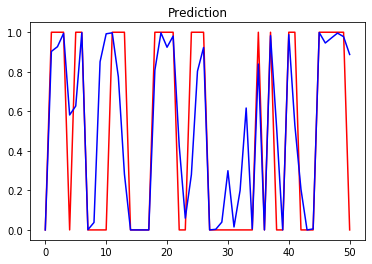

In [141]:
from sklearn.metrics import mean_absolute_error
print ("Mean absolute Error" , mean_absolute_error(y_test, predicted_prbability))
plt.plot(y_test.values, color = 'red', label = 'Real data')
plt.plot(predicted_prbability, color = 'blue', label = 'Predicted data')
plt.title('Prediction')

### Testing the same model with 2019 data

In [144]:
#X_test_singapore=X_test_singapore.drop('Predicted_probability',axis=1)

In [145]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()

LogReg.fit(X_train_singapore, y_train_singapore)

print("TRaining Set Scores:")
print(f" Logistic regression training set score: {LogReg.score(X_train_singapore, y_train_singapore)}")

print("Test Set Scores:")
print(f"Logistic regression testing score: {LogReg.score(X_test_singapore, y_test_singapore)}")


TRaining Set Scores:
 Logistic regression training set score: 0.9152542372881356
Test Set Scores:
Logistic regression testing score: 0.7894736842105263


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [146]:
from sklearn.metrics import confusion_matrix

y_pred = LogReg.predict(X_test_singapore)

In [147]:
predicted_prbability=LogReg.predict_proba(X_test_singapore)[:,1]

In [148]:
predicted_prbability.shape

(19,)

In [149]:
X_test_singapore=X_test_singapore.assign(Predicted_probability=" ")

In [150]:
X_test_singapore.shape

(19, 22)

In [151]:
X_test_singapore['Predicted_probability']=predicted_prbability


In [152]:
X_test_singapore

,raceId,driverId,D_points,D_wins,race_year,constructorId_x,starting_grid,laps_completed,statusId,D_age,...,visibility,temperatureHigh,temperatureLow,windSpeed,windBearing,humidity,averagetime_at_pitstop,number,q3,Predicted_probability
236,1024,822,231.0,1,2019,131,5,61,1,30,...,10.0,90.34,79.85,10.33,121.0,0.79,29234.0,77,5828,9.999901e-01
237,1024,1,296.0,1,2019,131,2,61,1,35,...,10.0,90.34,79.85,10.33,121.0,0.79,28930.0,44,5784,9.999905e-01
238,1024,830,200.0,1,2019,9,4,61,1,22,...,10.0,90.34,79.85,10.33,121.0,0.79,28846.0,33,5808,9.998806e-01
239,1024,848,42.0,0,2019,9,6,61,1,24,...,10.0,90.34,79.85,10.33,121.0,0.79,28606.0,23,5844,9.998131e-01
240,1024,20,194.0,1,2019,6,3,61,1,32,...,10.0,90.34,79.85,10.33,121.0,0.79,29384.0,5,5786,9.999500e-01
241,1024,844,200.0,1,2019,6,1,61,1,22,...,10.0,90.34,79.85,10.33,121.0,0.79,29168.0,16,5773,9.999607e-01
242,1024,825,18.0,0,2019,210,13,61,1,27,...,10.0,90.34,79.85,10.33,121.0,0.79,30159.5,20,5979,9.702321e-01
243,1024,154,8.0,0,2019,210,17,61,1,33,...,10.0,90.34,79.85,10.33,121.0,0.79,36516.0,8,6016,9.476462e-01
244,1024,807,33.0,0,2019,4,8,61,1,32,...,10.0,90.34,79.85,10.33,121.0,0.79,29357.5,27,5895,9.955196e-01
245,1024,8,31.0,0,2019,51,12,49,4,40,...,10.0,90.34,79.85,10.33,121.0,0.79,29992.0,7,5931,4.439460e-03


In [153]:
X_test_singapore=X_test_singapore[['driverId','Predicted_probability']]

In [154]:
X_test_singapore

,driverId,Predicted_probability
236,822,9.999901e-01
237,1,9.999905e-01
238,830,9.998806e-01
239,848,9.998131e-01
240,20,9.999500e-01
241,844,9.999607e-01
242,825,9.702321e-01
243,154,9.476462e-01
244,807,9.955196e-01
245,8,4.439460e-03


Mean absolute Error 0.0075779279712499025


Text(0.5, 1.0, 'Prediction')

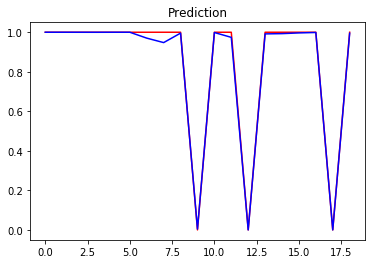

In [155]:
from sklearn.metrics import mean_absolute_error
print ("Mean absolute Error" , mean_absolute_error(y_pred, predicted_prbability))
plt.plot(y_pred, color = 'red', label = 'Real data')
plt.plot(predicted_prbability, color = 'blue', label = 'Predicted data')
plt.title('Prediction')

In [156]:
df_driver=pd.read_csv('./Capstone_core_data/drivers.csv')

In [157]:
df_driver=df_driver[['driverId','forename','surname']]

In [158]:
final_result=pd.merge(df_driver,X_test_singapore,how='inner',on='driverId')

In [159]:
final_result['Predicted_probability']=final_result['Predicted_probability']*100

In [160]:
final_result.sort_values(by='Predicted_probability',ascending=False)

,driverId,forename,surname,Predicted_probability
0,1,Lewis,Hamilton,99.999051
8,822,Valtteri,Bottas,99.999006
15,844,Charles,Leclerc,99.996073
3,20,Sebastian,Vettel,99.995000
11,830,Max,Verstappen,99.988059
18,848,Alexander,Albon,99.981305
12,832,Carlos,Sainz,99.882506
14,841,Antonio,Giovinazzi,99.857374
16,846,Lando,Norris,99.657230
6,807,Nico,Hülkenberg,99.551959


In [161]:
df_analysis=pd.read_csv('./intermediate_files/final_dataframe_singapore_analysis.csv',index_col=0)

In [162]:
final_result.head(2)

,driverId,forename,surname,Predicted_probability
0,1,Lewis,Hamilton,99.999051
1,8,Kimi,Raikkonen,0.443946


In [163]:
df_analysis.head(2)

,raceId,driverId,D_points,D_wins,race_year,constructorId_x,starting_grid,Ending_position,laps_completed,statusId,...,visibility,temperatureHigh,temperatureLow,windSpeed,windBearing,humidity,averagetime_at_pitstop,number,q3,is_win
0,32,1,84.0,1,2008,1,2,3,61,1,...,6.167,90.72,77.47,5.06,152.0,0.79,0.0,22,6327,1
1,32,5,51.0,1,2008,1,5,10,61,1,...,6.167,90.72,77.47,5.06,152.0,0.79,0.0,23,6352,1


In [164]:
df_test=df_analysis.loc[(df_analysis['race_year']==2019)]

In [165]:
df_verification=pd.merge(df_test,final_result,how='inner',on='driverId')

In [166]:
df_verification.columns

Index(['raceId', 'driverId', 'D_points', 'D_wins', 'race_year',
       'constructorId_x', 'starting_grid', 'Ending_position', 'laps_completed',
       'statusId', 'D_age', 'con_points', 'con_position', 'visibility',
       'temperatureHigh', 'temperatureLow', 'windSpeed', 'windBearing',
       'humidity', 'averagetime_at_pitstop', 'number', 'q3', 'is_win',
       'forename', 'surname', 'Predicted_probability'],
      dtype='object')

In [167]:
df_verification=df_verification[['raceId', 'driverId', 'race_year',
        'Ending_position',
       'is_win', 'forename', 'surname',
       'Predicted_probability']]

### FINAL RESULTS COMPARISION 2019 RESULTS WITH PREDICTED PROBABILITY

In [168]:
df_verification.sort_values(by='Ending_position',ascending=True)

,raceId,driverId,race_year,Ending_position,is_win,forename,surname,Predicted_probability
4,1024,20,2019,1,1,Sebastian,Vettel,99.995000
5,1024,844,2019,2,1,Charles,Leclerc,99.996073
2,1024,830,2019,3,1,Max,Verstappen,99.988059
1,1024,1,2019,4,1,Lewis,Hamilton,99.999051
0,1024,822,2019,5,1,Valtteri,Bottas,99.999006
3,1024,848,2019,6,1,Alexander,Albon,99.981305
15,1024,846,2019,7,1,Lando,Norris,99.657230
14,1024,842,2019,8,1,Pierre,Gasly,99.299543
8,1024,807,2019,9,1,Nico,Hülkenberg,99.551959
10,1024,841,2019,10,1,Antonio,Giovinazzi,99.857374


RESULTS_INTERPRETATION:

***MY MODELS' MEAN ABSOLUTTE ERROR IS 7.5%.There are few outliers as you can see from above results.

In [169]:
X_train_singapore=X_singapore[['raceId', 'driverId', 'D_points',  'D_wins', 'race_year',
        'constructorId_x', 'starting_grid', 
       'laps_completed', 'statusId', 'D_age', 'con_points', 'con_position',
       'visibility', 'temperatureHigh', 'temperatureLow', 'windSpeed',
       'windBearing', 'humidity', 'averagetime_at_pitstop', 'number', 'q3']]


In [170]:
y_train_singapore=X_singapore[['is_win']]

### spliting 2019 target column and independent variable to test the model 

In [171]:
X_test_singapore=X_test_2019[['raceId', 'driverId', 'D_points',  'D_wins', 'race_year',
       'constructorId_x', 'starting_grid', 
       'laps_completed', 'statusId', 'D_age', 'con_points', 'con_position',
       'visibility', 'temperatureHigh', 'temperatureLow', 'windSpeed',
       'windBearing', 'humidity', 'averagetime_at_pitstop', 'number', 'q3']]

In [172]:
y_test_singapore=X_test_2019[['is_win']]

In [173]:
from sklearn.metrics import confusion_matrix

y_pred = LogReg.predict(X_test_singapore)

In [174]:
predicted_prbability=LogReg.predict_proba(X_test_singapore)[:,1]

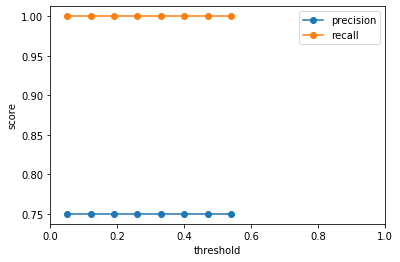

In [175]:
from sklearn.metrics import accuracy_score

# Vary thresholds by 0.05 from 0.05 to 0.95
thresholds = np.arange(0.05, 0.6, 0.07)

precisions = list()
recalls = list()

for threshold in thresholds:

    # Apply threshold
    y_threshold = np.where(predicted_prbability > threshold, 1, 0)
    
    # Calculate precision and recall
    precision = precision_score(y_test_singapore, y_threshold)
    recall = recall_score(y_test_singapore, y_threshold)
    
    # Append to list
    precisions.append(precision)
    recalls.append(recall)

# Visualize the result
plt.figure()
plt.plot(thresholds, precisions, label='precision', marker='o')
plt.plot(thresholds, recalls, label='recall', marker='o')
plt.xlim(0, 1)
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.show()

---
### Scaled Logistic regression test results

---

In [ ]:
df_analysis.to_csv('./intermediate_files/final_dataframe_singapore_analysis.csv')

In [ ]:
X_test_2019=df_analysis.loc[(df_analysis['race_year']==2019)]

### Machine Learning Model:1

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [177]:
X=df_analysis.iloc[:,:-1]
y=df_analysis.iloc[:,-1]

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [180]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled_train= scaler.transform(X_train)
X_scaled_test= scaler.transform(X_test)

In [181]:
from sklearn.linear_model import LogisticRegression

LogReg_scaled = LogisticRegression(C=0.01).fit(X_scaled_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [182]:
print(LogReg_scaled.score(X_test,y_test))
print(LogReg_scaled.score(X_scaled_test,y_test))

0.5294117647058824
0.9411764705882353


---
---

### Confustion matirx on Sclaed data

In [183]:
from sklearn.metrics import confusion_matrix

y_pred = LogReg_scaled.predict(X_scaled_test)

confusion_matrix(y_test, y_pred)

array([[26,  1],
       [ 2, 22]])

In [184]:
cm = confusion_matrix(y_test, y_pred)

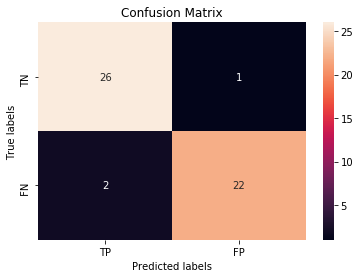

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['TP','FP']); 
ax.yaxis.set_ticklabels(['TN',' FN']);

In [186]:
# Precision 
from sklearn.metrics import precision_score

# precision_score(true labels, predicted labels)
precision_score(y_test, y_pred)

0.9565217391304348

In [187]:
# Recall
from sklearn.metrics import recall_score

# recall_score(true labels, predicted labels)
recall_score(y_test, y_pred)

0.9166666666666666

In [188]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.9361702127659574

In [189]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        27
           1       0.96      0.92      0.94        24

    accuracy                           0.94        51
   macro avg       0.94      0.94      0.94        51
weighted avg       0.94      0.94      0.94        51



In [190]:
predicted_prbability=LogReg_scaled.predict_proba(X_scaled_test)

In [191]:
predicted_prbability.shape

(51, 2)

In [192]:
X_test=X_test.assign(Predicted_probability=" ")

In [193]:
X_test['Predicted_probability']=predicted_prbability*100

In [194]:
X_test

,raceId,driverId,D_points,D_wins,race_year,constructorId_x,starting_grid,Ending_position,laps_completed,statusId,...,visibility,temperatureHigh,temperatureLow,windSpeed,windBearing,humidity,averagetime_at_pitstop,number,q3,Predicted_probability
182,962,154,28.0,0,2016,210,20,22,0,54,...,5.945,92.92,77.95,4.22,248.0,0.75,0.000000,8,6343,94.164520
34,14,8,40.0,1,2009,6,12,10,61,1,...,5.380,92.29,81.09,6.34,188.0,0.74,0.000000,4,6430,34.728341
110,893,8,149.0,1,2013,208,13,3,61,1,...,6.208,91.56,79.17,8.46,180.0,0.72,31241.000000,7,6279,30.623458
112,893,4,187.0,1,2013,6,7,2,61,1,...,6.208,91.56,79.17,8.46,180.0,0.72,29306.000000,3,6236,17.388912
226,1003,815,46.0,0,2018,10,7,16,60,11,...,9.831,88.43,79.36,9.87,157.0,0.76,28293.000000,11,5879,51.253616
107,873,817,6.0,0,2012,5,15,9,59,1,...,5.365,91.54,77.78,4.73,197.0,0.76,30390.500000,16,6526,47.731178
159,939,822,101.0,0,2015,3,7,5,61,1,...,4.261,91.65,80.91,4.59,92.0,0.76,29249.500000,77,6340,24.743981
27,14,67,3.0,0,2009,5,13,16,47,6,...,5.380,92.29,81.09,6.34,188.0,0.74,0.000000,12,6442,64.150071
245,1024,8,31.0,0,2019,51,12,18,49,4,...,10.000,90.34,79.85,10.33,121.0,0.79,29992.000000,7,5931,60.079935
186,962,832,30.0,0,2016,5,6,14,60,11,...,5.945,92.92,77.95,4.22,248.0,0.75,28629.000000,55,6251,50.027307


In [195]:
X_test.columns

Index(['raceId', 'driverId', 'D_points', 'D_wins', 'race_year',
       'constructorId_x', 'starting_grid', 'Ending_position', 'laps_completed',
       'statusId', 'D_age', 'con_points', 'con_position', 'visibility',
       'temperatureHigh', 'temperatureLow', 'windSpeed', 'windBearing',
       'humidity', 'averagetime_at_pitstop', 'number', 'q3',
       'Predicted_probability'],
      dtype='object')

In [196]:
X_test=X_test[['driverId','Predicted_probability','race_year']]

In [197]:
df_driver=pd.read_csv('./Capstone_core_data/drivers.csv')

In [198]:
df_driver=df_driver[['driverId','forename','surname']]

In [199]:
final_result=pd.merge(df_driver,X_test,how='inner',on='driverId')

In [200]:
final_result.sort_values(by='race_year',ascending=False)

,driverId,forename,surname,Predicted_probability,race_year
13,8,Kimi,Raikkonen,60.079935,2019
49,840,Lance,Stroll,54.286052,2019
14,9,Robert,Kubica,58.097925,2019
50,844,Charles,Leclerc,45.825568,2018
35,815,Sergio,Perez,51.253616,2018
44,828,Marcus,Ericsson,50.419677,2018
43,822,Valtteri,Bottas,20.535554,2018
10,4,Fernando,Alonso,92.689015,2017
48,838,Stoffel,Vandoorne,37.613528,2017
46,832,Carlos,Sainz,50.027307,2016


In [201]:
# Make probabilistic predictions (scores)

y_proba = LogReg_scaled.predict_proba(X_scaled_test)[:,1]

# First calculate precision and recall using the default (0.5) cut-off

y_threshold = np.where(y_proba >= 0.5, 1, 0)
print("Threshold of 0.5:")
print(f"Precision score: {precision_score(y_test, y_threshold)}")
print(f"Recall score: {recall_score(y_test, y_threshold)}")
print("")

# Calculate the same using a much lower cut-off (0.2)
y_threshold = np.where(y_proba >= 0.2, 1, 0)


print("Threshold of 0.2:")
print(f"Precision score: {precision_score(y_test, y_threshold)}")
print(f"Recall score: {recall_score(y_test, y_threshold)}")

Threshold of 0.5:
Precision score: 0.9565217391304348
Recall score: 0.9166666666666666

Threshold of 0.2:
Precision score: 0.5333333333333333
Recall score: 1.0


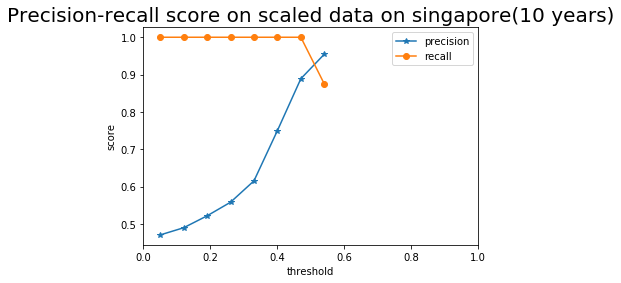

In [202]:
from sklearn.metrics import accuracy_score

# Vary thresholds by 0.05 from 0.05 to 0.95
thresholds = np.arange(0.05, 0.6, 0.07)

precisions = list()
recalls = list()

for threshold in thresholds:

    # Apply threshold
    y_threshold = np.where(y_proba > threshold, 1, 0)
    
    # Calculate precision and recall
    precision = precision_score(y_test, y_threshold)
    recall = recall_score(y_test, y_threshold)
    
    # Append to list
    precisions.append(precision)
    recalls.append(recall)

# Visualize the result
plt.figure()
plt.plot(thresholds, precisions, label='precision', marker='*')
plt.plot(thresholds, recalls, label='recall', marker='o')
plt.xlim(0, 1)
plt.title("Precision-recall score on scaled data on singapore(10 years)",size=20)
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.show()

### Decision Trees Model fitting ###

### This is the file driver standings with pit stops details,constructor results,results,Singapore season with age

In [203]:
from sklearn.tree import DecisionTreeClassifier

In [228]:
df_analysis=pd.read_csv('./intermediate_files/final_dataframe_singapore_analysis.csv',index_col=0)

In [229]:
X=df_analysis.iloc[:,:-1]
y=df_analysis.iloc[:,-1]

In [230]:
df_analysis.head(3)

,raceId,driverId,D_points,D_wins,race_year,constructorId_x,starting_grid,Ending_position,laps_completed,statusId,...,visibility,temperatureHigh,temperatureLow,windSpeed,windBearing,humidity,averagetime_at_pitstop,number,q3,is_win
0,32,1,84.0,1,2008,1,2,3,61,1,...,6.167,90.72,77.47,5.06,152.0,0.79,0.0,22,6327,1
1,32,5,51.0,1,2008,1,5,10,61,1,...,6.167,90.72,77.47,5.06,152.0,0.79,0.0,23,6352,1
2,32,2,56.0,0,2008,2,9,6,61,1,...,6.167,90.72,77.47,5.06,152.0,0.79,0.0,3,6357,1


In [231]:
df_analysis=df_analysis.drop(['Ending_position','laps_completed'],axis=1)

In [232]:
from sklearn.model_selection import train_test_split

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [234]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled_train= scaler.transform(X_train)
X_scaled_test= scaler.transform(X_test)

In [235]:
# Instantiate & fit the DT
dt_model = DecisionTreeClassifier(max_depth=10,random_state=1)
dt_model.fit(X_scaled_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [236]:

# Evaluate its classification accuracy (Just on the training set for now)
print(f"DT training set accuracy: {dt_model.score(X_scaled_train, y_train)}")
print(f"The TEST classification accuracy is:  {dt_model.score(X_scaled_test,y_test)}")

DT training set accuracy: 1.0
The TEST classification accuracy is:  1.0


In [237]:
train_accuracies = []
test_accuracies = []
depths = []

for d in range(1, 10):
    race_dt = DecisionTreeClassifier(max_depth=d, random_state=1)
    race_dt.fit(X_scaled_train, y_train)

    train_accuracy = race_dt.score(X_scaled_train, y_train)
    test_accuracy = race_dt.score(X_scaled_test, y_test)

    depths.append(d)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

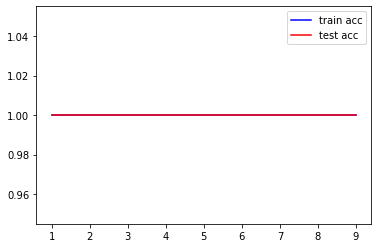

In [238]:
plt.figure()
plt.plot(depths, train_accuracies, c="blue", label="train acc")
plt.plot(depths, test_accuracies, c="red", label="test acc")
plt.legend()
plt.show()

In [239]:
race_dt.feature_importances_


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [240]:
len(df_analysis.columns)

21

In [241]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [242]:
#Score it
train_prediction = race_dt.predict(X_train)
test_prediction = race_dt.predict(X_test)
accuracy_train = accuracy_score(train_prediction, y_train)
accuracy_test = accuracy_score(test_prediction, y_test)

print(f"Score on training set: {accuracy_train:0.3f}")
print(f"Score on test set: {accuracy_test:0.3f}")

Score on training set: 0.417
Score on test set: 0.529
